<a href="https://colab.research.google.com/github/kunalsanga/BIO_reactor/blob/main/Smart_BIO_Reactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adding Advanced Features

MAE: 0.3763181818181818, MSE: 0.3202313636363637, R2: 0.45569102721685684


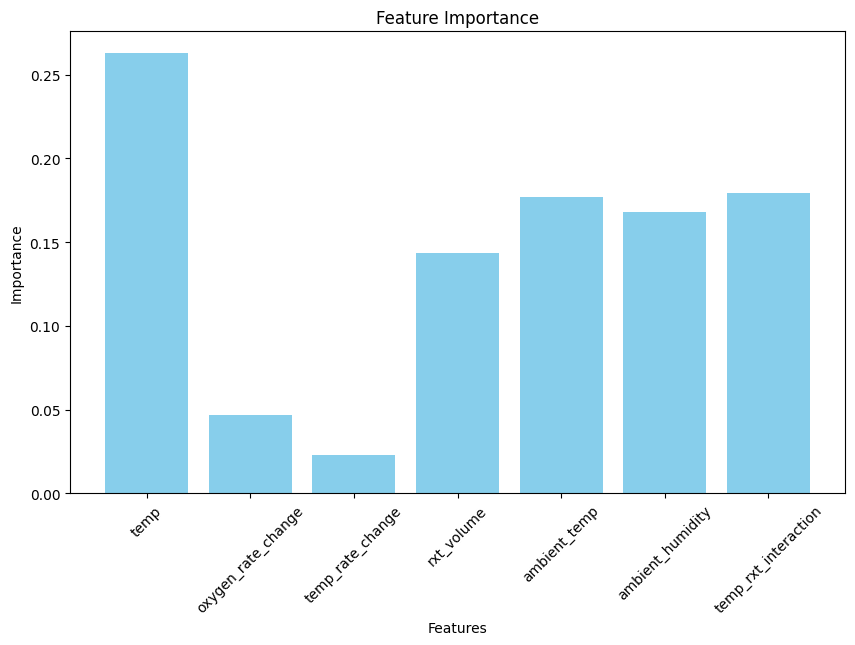

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset
file_path = 'biodata.csv'
data = pd.read_csv(file_path)

# Add new derived features
data['temp_rate_change'] = data['temp'].diff().fillna(0)  # Rate of temperature change
data['oxygen_rate_change'] = data['oxygen'].diff().fillna(0)  # Rate of oxygen change
data['media_encoded'] = data['media'].astype('category').cat.codes  # Encode media

# Environmental conditions (mock data for example)
data['ambient_temp'] = np.random.uniform(20, 30, len(data))  # Simulating ambient temperature
data['ambient_humidity'] = np.random.uniform(30, 70, len(data))  # Simulating ambient humidity

# Handling missing values
data = data.dropna(subset=['oxygen'])
data['temp'] = data['temp'].fillna(data['temp'].mean())
data['rxt_volume'] = data['rxt_volume'].fillna(data['rxt_volume'].mean())
data['media'] = data['media'].fillna('Unknown')

# Add interaction terms
data['temp_rxt_interaction'] = data['temp'] * data['rxt_volume']

# One-hot encoding for categorical features
data = pd.get_dummies(data, columns=['media'], drop_first=True)

# Select features and target
columns = ['temp', 'oxygen_rate_change', 'temp_rate_change', 'rxt_volume',
           'ambient_temp', 'ambient_humidity', 'temp_rxt_interaction']
X = data[columns]
y = data['oxygen']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")

# Plot feature importance
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

# Plot predictions vs actuals
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
fig = px.scatter(results, x='Actual', y='Predicted', title="Model Predictions vs Actual Oxygen Levels")
fig.show()


 Adding Real-Time Capabilities

In [12]:
import time

# Real-time Prediction for Sample 5: 2.01


# Simulating real-time sensor data stream
def simulate_reactor_stream(model, X_real_time):
    for i in range(len(X_real_time)):
        sample = X_real_time.iloc[i:i+1]
        prediction = model.predict(sample)
        print(f"Real-time Prediction for Sample {i+1}: {prediction[0]:.2f}")
        time.sleep(1)  # Simulate delay for real-time updates

# Subset real-time data simulation
real_time_data = X_test.sample(5)
simulate_reactor_stream(model, real_time_data)
# Simulating real-time sensor data stream
def simulate_reactor_stream(model, X_real_time):
    for i in range(len(X_real_time)):
        sample = X_real_time.iloc[i:i+1]
        prediction = model.predict(sample)
        print(f"Real-time Prediction for Sample {i+1}: {prediction[0]:.2f}")
        time.sleep(1)  # Simulate delay for real-time updates

# Subset real-time data simulation
real_time_data = X_test.sample(5)
simulate_reactor_stream(model, real_time_data)


Real-time Prediction for Sample 1: 1.37
Real-time Prediction for Sample 2: 2.11
Real-time Prediction for Sample 3: 1.17
Real-time Prediction for Sample 4: 1.46
Real-time Prediction for Sample 5: 1.99
Real-time Prediction for Sample 1: 1.41
Real-time Prediction for Sample 2: 2.04
Real-time Prediction for Sample 3: 1.35
Real-time Prediction for Sample 4: 2.14
Real-time Prediction for Sample 5: 1.03


 Implementing Anomaly Detection

In [13]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest for anomaly detection
iso_forest = IsolationForest(random_state=42, contamination=0.1)
data['anomaly_score'] = iso_forest.fit_predict(X)

# Highlight anomalies
anomalies = data[data['anomaly_score'] == -1]
print(f"Number of anomalies detected: {len(anomalies)}")

# Visualize anomalies
fig = px.scatter(data, x='temp', y='oxygen', color='anomaly_score',
                 title="Anomaly Detection in Bioreactor Data")
fig.show()


Number of anomalies detected: 110


Auto-Tuning Parameters with Grid Search

In [14]:
from sklearn.model_selection import GridSearchCV

# Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
best_model = grid_search.best_estimator_


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


Sustainability Metrics Integration

In [15]:
# Adding a sustainability metric (mock data)
data['waste_reduction'] = np.random.uniform(0, 1, len(data))  # Simulating waste reduction data

# Training a sustainability-aware model
columns += ['waste_reduction']
X = data[columns]
model.fit(X_train, y_train)

# Visualizing sustainability impact
fig = px.scatter(data, x='waste_reduction', y='oxygen', title="Sustainability vs Oxygen Levels")
fig.show()


 Cloud Integration for Real-Time Monitoring

In [16]:
# Save model for deployment
import joblib
joblib.dump(model, 'bioreactor_model.pkl')


['bioreactor_model.pkl']